# Gender Classification
Merupakan model machine learning sederhana untuk meprediksi gender seseorang, apakah dia seorang laki-laki atau perempuan berdasarkan data fiksi yang berisi tinggi badan, berat badan, dan ukuran sepatu.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from collections import Counter

In [4]:
x = np.array(
    [
        [166, 60, 39],
        [162, 56, 37],
        [175, 54, 41],
        [170, 51, 40],
        [173, 56, 42],
        [162, 56, 38],
        [178, 72, 42],
        [167, 60, 39],
        [192, 85, 45],
        [159, 54, 37],
        [186, 79, 44],
        [164, 58, 38],
        [179, 57, 42],
        [172, 65, 40],
        [188, 82, 44],
        [160, 55, 37],
        [182, 76, 43],
        [169, 62, 39],
        [194, 88, 46],
        [157, 52, 36],
        [190, 84, 45],
        [166, 59, 38],
        [184, 78, 43],
        [174, 67, 41],
        [177, 51, 42],
        [163, 57, 39],
        [191, 83, 44],
        [161, 56, 38],
        [187, 80, 43],
        [171, 64, 40],
        [180, 74, 42],
        [168, 61, 39],
        [193, 86, 45],
        [165, 59, 39],
        [189, 60, 44],
        [173, 54, 41],
        [182, 75, 42],
        [170, 62, 40],
        [196, 89, 46],
        [167, 60, 39],
        [185, 78, 43],
        [176, 69, 41],
        [179, 72, 42],
        [174, 65, 40],
        [192, 84, 44],
        [171, 63, 40],
        [187, 79, 43],
        [169, 61, 39],
        [181, 74, 42],
        [177, 70, 41],
        [195, 87, 45],
        [166, 59, 39],
        [183, 77, 43],
        [173, 66, 40],
        [190, 82, 44],
        [165, 58, 38],
        [186, 79, 43],
        [172, 65, 40],
        [180, 73, 42],
        [168, 62, 39],
        [193, 85, 45],
        [164, 57, 38],
        [188, 80, 43],
        [175, 68, 41],
        [182, 75, 42],
        [171, 64, 40],
        [196, 88, 46],
        [167, 60, 39],
        [185, 79, 43],
        [178, 71, 41],
        [179, 72, 42],
        [174, 66, 40],
        [192, 84, 44],
        [169, 63, 39],
        [188, 80, 43],
        [172, 65, 40],
        [184, 77, 42],
        [170, 62, 39],
        [197, 89, 46],
        [168, 61, 39],
        [183, 76, 42],
        [176, 69, 41],
        [181, 73, 42],
        [173, 65, 40],
        [195, 86, 45],
        [171, 64, 40],
        [190, 82, 44],
        [169, 62, 39],
        [187, 79, 43],
        [175, 67, 41],
        [191, 83, 44],
        [163, 56, 38],
        [185, 78, 43],
        [172, 65, 40],
        [180, 72, 42],
        [168, 61, 39],
        [194, 85, 45],
        [166, 59, 39],
        [189, 81, 44],
        [174, 67, 41],
        [182, 75, 42],
        [171, 63, 40],
        [196, 87, 46],
        [169, 62, 39],
        [184, 77, 43],
        [177, 70, 41],
        [178, 71, 42],
        [175, 68, 41],
        [193, 85, 45],
        [167, 60, 39],
        [187, 80, 44],
        [173, 66, 40],
        [181, 74, 42],
        [170, 63, 39],
        [195, 86, 46],
        [168, 61, 39],
        [183, 77, 43],
        [176, 69, 41],
        [179, 72, 42],
        [174, 67, 40],
        [192, 84, 45],
        [171, 64, 40],
        [162, 56, 38],
        [167, 60, 39],
        [159, 54, 37],
        [164, 58, 38],
        [160, 55, 37],
        [169, 62, 39],
        [157, 52, 36],
        [161, 56, 38],
        [168, 61, 39],
        [163, 57, 38],
        [165, 59, 38],
        [158, 53, 36],
        [166, 60, 39],
        [162, 55, 37],
        [170, 63, 40],
        [159, 54, 36],
        [167, 61, 38],
        [164, 58, 37],
        [160, 56, 38],
        [169, 62, 40],
        [157, 52, 36],
        [161, 55, 37],
        [168, 60, 39],
        [163, 57, 37],
        [165, 59, 38],
        [158, 53, 36],
        [166, 60, 38],
        [159, 55, 36],
        [167, 61, 38],
        [164, 58, 37],
        [160, 56, 38],
        [169, 62, 39],
        [157, 52, 36],
        [161, 54, 37],
        [168, 60, 38],
        [163, 57, 37],
        [165, 59, 38],
        [158, 53, 36],
    ]
)

y = np.array(
    [
        "female",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "male",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "female",
        "male",
        "female",
        "female",
        "male",
        "male",
        "male",
        "male",
        "female",
        "male",
        "male",
        "male",
        "male",
        "male",
        "male",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
        "female",
    ]
)

In [5]:
# membuat DataFrame
data = pd.DataFrame(x, columns=["Height", "Weight", "Shoe Size"])
data["Label"] = y

In [6]:
# membersihkan data
cleaned_data = data.dropna()

In [22]:
# mengacak(shuffling) data
shuffled_data = cleaned_data.sample(frac=1).reset_index(drop=True)
x_shuffled = shuffled_data[["Height", "Weight", "Shoe Size"]]
y_shuffled = shuffled_data["Label"]

# Membagi data menjadi training dan test data
X_train, X_test, y_train, y_test = train_test_split(
    x_shuffled, y_shuffled, test_size=0.3, random_state=42
)

# menggabungkan kolom kolom data
train_data = pd.concat([X_train, pd.Series(y_train, name="Gender")], axis=1)
test_data = pd.concat([X_test, pd.Series(y_test, name="Gender")], axis=1)

# mengurutkan kolom kolom data
train_data = train_data[["Height", "Weight", "Shoe Size", "Gender"]]
test_data = test_data[["Height", "Weight", "Shoe Size", "Gender"]]

In [24]:
# menentukan parameter untuk melatih model dengan Grid Search
# parameter decision tree
max_depth = list(range(2, 8))
min_samples_split = list(range(2, 6))
min_samples_leaf = list(range(2, 6))

# parameter knn
n_neighbors = list(range(1, 15))
leaf_size = list(range(1, 30))

model_params = {
    'decison_tree': {
        'model': tree.DecisionTreeClassifier(random_state = 42),
        'params': {
            'max_depth': max_depth,
            'criterion': ['gini', 'entropy'],
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }
    },

    'kneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': n_neighbors,
            'leaf_size': leaf_size,
            'p': [1, 2],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']
        }
    },

    'logistic_regression': {
        'model': LogisticRegression(max_iter = 100000),
        'params': {
            'C': [0.001, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear','saga']
        }
    }
}

In [9]:
# mengecek nilai NaN pada data
print("Check NaN value:")
print(shuffled_data.isnull().sum())

Check NaN value:
Height       0
Weight       0
Shoe Size    0
Label        0
dtype: int64


In [23]:
print("\nTraining Data")
counts_train_data = Counter(y_train)
print("male:", counts_train_data["male"])
print("female:", counts_train_data["female"])

print("\nTesting Data")
counts_test_data = Counter(y_test)
print("male:", counts_test_data["male"])
print("female:", counts_test_data["female"])


Training Data
male: 61
female: 51

Testing Data
male: 24
female: 24


In [25]:
# mencari model dengan performa terbaik
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
pd.set_option('display.max_colwidth', None)
df

,model,best_score,best_params
0,decison_tree,0.866008,"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}"
1,kneighbors,0.892095,"{'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
2,logistic_regression,0.847036,"{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}"


In [26]:
# menggunakan classifier dengan best score tertinggi
best_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=3, p=1, weights='uniform')
best_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=3, p=1)

akurasi model: 0.9375
f1 score: 0.93747
Confusion Matrix:


<Axes: >

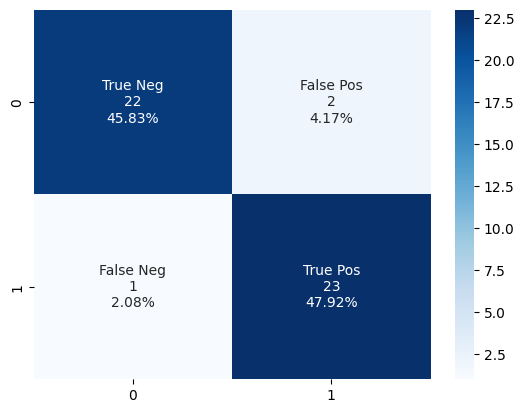

In [28]:
# evluasi model
y_pred_best_clf = best_clf.predict(X_test)

# menghitung akurasi model
accuracy_best_clf = round(accuracy_score(y_test, y_pred_best_clf), 5)
print('akurasi model:', accuracy_best_clf)

# menghitung f1 score
f1_best_clf = round(f1_score(y_test, y_pred_best_clf, average="macro"), 5)
print('f1 score:', f1_best_clf)

# menghitung dan memvisualisasikan confusion matrix
cf_best_clf = confusion_matrix(y_test, y_pred_best_clf)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_best_clf.flatten()]
group_precentages = ["{0:.2%}".format(value) for value in cf_best_clf.flatten()/np.sum(cf_best_clf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_precentages)]
labels = np.asarray(labels).reshape(2,2)

print('Confusion Matrix:')
sns.heatmap(cf_best_clf, annot=labels, fmt='', cmap='Blues')

In [32]:
# melakukan prediksi dari input user
while True:
    print('Gender Prediction Machine Learning Model')
    num_data = int(input('Berapa data yang mau dites?:'))

    def get_user_input(n):
        print(f'\nMasukkan data ke-{n}:')
        height = float(input('Masukkan tinggi badan (cm):'))
        weight = float(input('Masukkan berat badan (kg):'))
        shoe_size = float(input('Masukkan ukuran sepatu:'))
        return [height, weight, shoe_size]

    user_data = []
    num_inputs = num_data
    for i in range(1, num_inputs + 1):
        user_input = get_user_input(i)
        user_data.append(user_input)

    input_data = pd.DataFrame(user_data, columns=["Height", "Weight", "Shoe Size"])

    prediction_results = pd.DataFrame(
        columns=[
            "Height",
            "Weight",
            "Shoe Size",
            "Gender"
        ]
    )

    print('\nHasil Prediksi')
    for _, row in input_data.iterrows():
        prediction_gd = best_clf.predict(pd.DataFrame([row], columns=input_data.columns))
        prediction_results.loc[len(prediction_results)] = [
            row["Height"],
            row["Weight"],
            row["Shoe Size"],
            prediction_gd[0]
        ]

    print(tabulate(prediction_results, headers="keys", tablefmt="grid", showindex=False))

    repeat = input('Ingin tes data lagi? (y/n): ').strip().lower()
    if repeat !="y":
        break
        

Gender Prediction Machine Learning Model


Berapa data yang mau dites?: 2



Masukkan data ke-1:


Masukkan tinggi badan (cm): 176
Masukkan berat badan (kg): 62
Masukkan ukuran sepatu: 42



Masukkan data ke-2:


Masukkan tinggi badan (cm): 165
Masukkan berat badan (kg): 58
Masukkan ukuran sepatu: 39



Hasil Prediksi
+----------+----------+-------------+----------+
|   Height |   Weight |   Shoe Size | Gender   |
+==========+==========+=============+==========+
|      176 |       62 |          42 | male     |
+----------+----------+-------------+----------+
|      165 |       58 |          39 | female   |
+----------+----------+-------------+----------+


Ingin tes data lagi? (y/n):  n
